<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Kernal_Trick_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

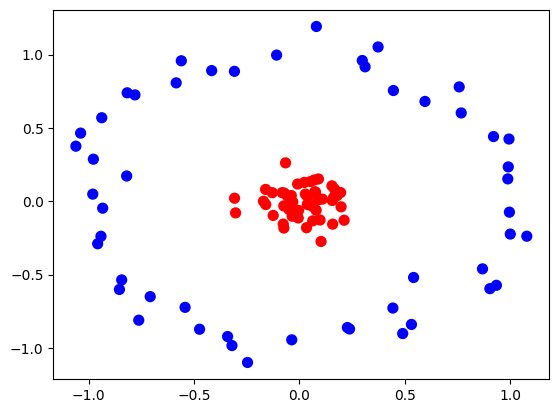

In [ ]:
# data
from sklearn.datasets import make_circles
X,y = make_circles(100,factor=.1,noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='bwr')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel ="linear")
svc.fit(X_train,y_train.ravel())
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test , y_pred))

0.55


In [ ]:
# plot the decision boundary of the linear data
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-16-20a70204dfc0>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


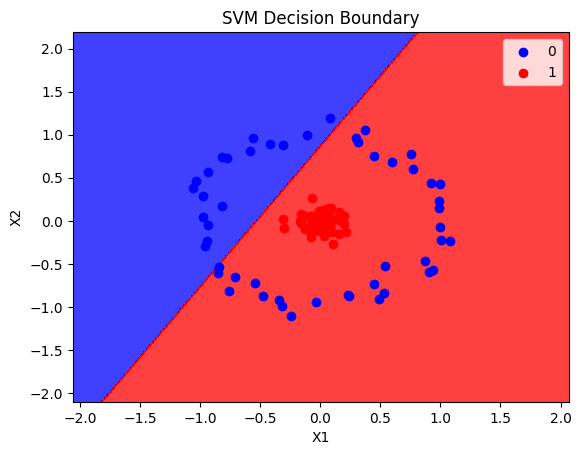

In [ ]:
plot_decision_boundary(X,y,svc)

In [ ]:
# using kernel e^(-x^2) to transform data

# plot the transformed data
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))  # kernel
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

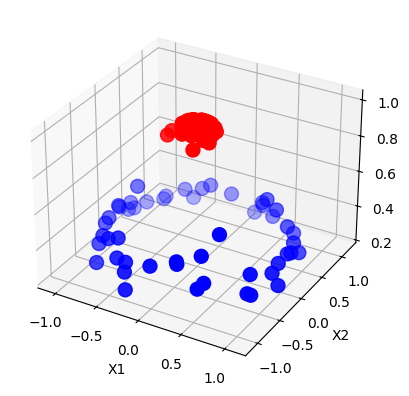

In [ ]:
plot_3d_plot(X,y)

In [ ]:
# now in the higher dimension the data is separable using a single hyperplane

# make a kernal svm

rbf_svm = SVC(kernel="rbf")
rbf_svm.fit(X_train,y_train)
y_pred = rbf_svm.predict(X_test)

print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
# accuracy is now 100 % , hence data is completely separable

<ipython-input-16-20a70204dfc0>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


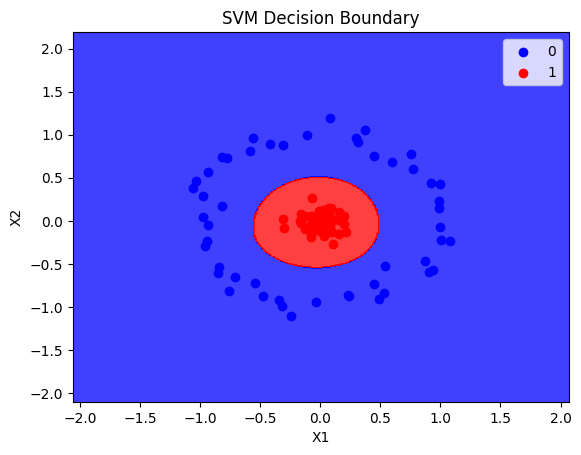

In [ ]:
# plot the new decision boundary
plot_decision_boundary(X,y,rbf_svm)

In [ ]:
# using polynomial kernal

poly_svm = SVC(kernel="poly",degree=2)
poly_svm.fit(X_train , y_train)
y_pred = poly_svm.predict(X_test)

print("accuracy",accuracy_score(y_test,y_pred))

accuracy 1.0


<ipython-input-16-20a70204dfc0>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


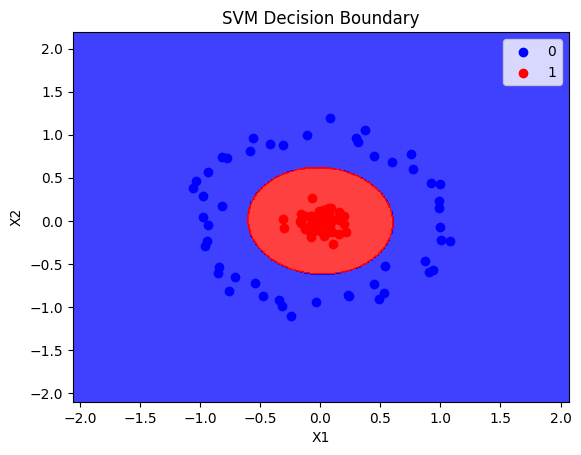

In [ ]:
plot_decision_boundary(X,y,poly_svm)

In [ ]:
X
# original data 'X'

array([[ 8.68950600e-02,  8.69215327e-03],
       [-3.84138227e-02, -2.13163028e-02],
       [ 9.96229164e-01, -7.43912101e-02],
       [ 4.89956729e-01, -9.02302825e-01],
       [-3.42253531e-02, -1.02247046e-01],
       [ 2.27578721e-01, -8.61406160e-01],
       [ 1.78055516e-01,  3.73468011e-02],
       [-4.16238274e-01,  8.90930634e-01],
       [ 6.29785948e-02, -1.33884067e-01],
       [-7.80220356e-01,  7.25266885e-01],
       [ 2.83225209e-02,  4.86462346e-02],
       [-2.46173676e-01, -1.09954561e+00],
       [-8.53849981e-01, -6.01619412e-01],
       [ 7.94085913e-02, -6.15665863e-02],
       [-3.84825670e-02,  3.87463368e-02],
       [ 2.37805509e-01, -8.71178586e-01],
       [ 1.02643454e-01, -2.74289834e-01],
       [ 3.11592027e-01,  9.16762281e-01],
       [ 3.36542906e-02, -1.80560996e-01],
       [ 9.78634127e-02, -1.27856709e-01],
       [-1.60328320e-01,  8.06941074e-02],
       [-5.60395722e-01,  9.57853759e-01],
       [ 9.34416018e-01, -5.73218261e-01],
       [-7.

In [ ]:
# data after transforming
np.exp(-(X**2)).sum(1)

array([1.99240213, 1.99807118, 1.36514032, 1.22959811, 1.98842931,
       1.42567712, 1.96739972, 1.29306646, 1.9782763 , 1.13499083,
       1.9968345 , 1.23969371, 1.17868232, 1.98993085, 1.99702004,
       1.41317459, 1.9170452 , 1.33898967, 1.96679148, 1.97425402,
       1.96813201, 1.1300104 , 1.13758683, 1.26094614, 1.40989088,
       1.97017048, 1.99513906, 1.98990892, 1.92944954, 1.99352122,
       1.3374985 , 1.36551949, 1.23515075, 1.23166238, 1.97593967,
       1.90612484, 1.31282714, 1.35865199, 1.97532222, 1.98309661,
       1.99556272, 1.31943828, 1.96905525, 1.40813619, 1.99811786,
       1.5088052 , 1.97434084, 1.20741602, 1.09170197, 1.96017656,
       1.3533028 , 1.24118425, 1.13807007, 1.07729893, 1.99603771,
       1.99898758, 1.32124336, 1.3186431 , 1.25705403, 1.99055504,
       1.97416821, 1.24755253, 1.99439316, 1.95900382, 1.41621071,
       1.38016461, 1.97935133, 1.96574555, 1.99175305, 1.90921316,
       1.31726717, 1.14626544, 1.98803012, 1.10736464, 1.27868

In [ ]:
X_new = np.exp(-(X**2))

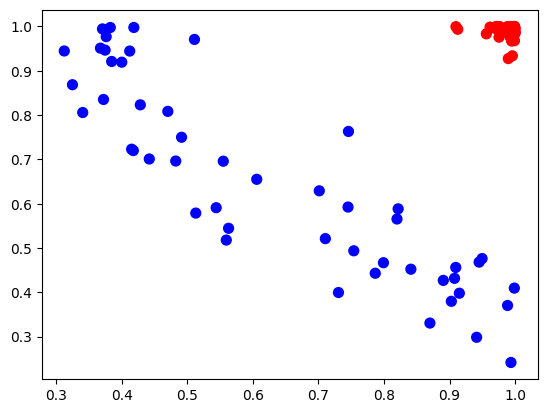

In [ ]:
plt.scatter(X_new[:,0],X_new[:,1],c=y,s=50,cmap='bwr')